# Canada Visitor Entries Cleaning and EDA

**Data Source:** Stats Canada Table 24-10-0050-01 - Canada-wide (manually extracted)  
**Location:** `data/interim/nonresident_visitors_canada_manual.csv`  
**Purpose:** Clean, validate, and perform EDA on Canada-wide visitor entries data  
**Date:** December 2025

## Objectives
1. Clean and validate Canada-wide visitor entries data
2. Validate against Travel Manitoba Q4 2024 & Q1 2024 infographics
3. Explore trends by country of residence
4. Prepare dataset for Power BI dashboard

## Setup

In [1]:
# Path setup
import sys
from pathlib import Path
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root / 'scripts'))
from paths import raw, processed, interim

In [2]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.0f}'.format)

print('✓ Libraries loaded')

✓ Libraries loaded


## Part 1: Data Loading & Cleaning

### 1.1 Load Raw Data

In [3]:
csv_path = interim() / 'nonresident_visitors_canada_manual.csv'

if not csv_path.exists():
    print(f'ERROR: File not found at {csv_path}')
else:
    print(f'✓ Found: {csv_path}')
    print(f'  Size: {csv_path.stat().st_size:,} bytes')

✓ Found: /Users/dpro/projects/travel_manitoba/data/interim/nonresident_visitors_canada_manual.csv
  Size: 18,980 bytes


In [4]:
# Load CSV
df_raw = pd.read_csv(csv_path, encoding='utf-8-sig')

print('RAW DATA')
print('='*80)
print(f'Shape: {df_raw.shape}')
print(f'\nFirst 8 rows:')
df_raw.head(8)

RAW DATA
Shape: (38, 71)

First 8 rows:


,Country of residence 2,Jan-20,Feb-20,Mar-20,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,Dec-20,Jan-21,Feb-21,Mar-21,Apr-21,May-21,Jun-21,Jul-21,Aug-21,Sep-21,Oct-21,Nov-21,Dec-21,Jan-22,Feb-22,Mar-22,Apr-22,May-22,Jun-22,Jul-22,Aug-22,Sep-22,Oct-22,Nov-22,Dec-22,Jan-23,Feb-23,Mar-23,Apr-23,May-23,Jun-23,Jul-23,Aug-23,Sep-23,Oct-23,Nov-23,Dec-23,Jan-24,Feb-24,Mar-24,Apr-24,May-24,Jun-24,Jul-24,Aug-24,Sep-24,Oct-24,Nov-24,Dec-24,Jan-25,Feb-25,Mar-25,Apr-25,May-25,Jun-25,Jul-25,Aug-25,Sep-25,Oct-25
0,Non-resident visitors entering Canada,"1,567,317","1,595,707","760,252","67,654","86,362","121,524","141,772","158,664","147,777","139,916","127,159","154,246","120,921","101,655","123,583","130,634","140,287","162,940","258,469","600,982","671,662","649,352","560,271","761,360","298,217","419,837","614,160","1,001,313","1,428,129","2,188,742","2,814,980","2,515,454","2,029,087","1,755,938","1,268,343","1,589,448","1,107,737","1,200,979","1,382,309","1,674,026","2,377,019","3,354,384","3,998,113","3,605,712","2,857,225","2,138,008","1,520,059","1,993,965","1,189,366","1,459,708","1,682,944","1,886,774","2,687,964","3,643,749","4,260,020","4,007,080","2,882,158","2,252,283","1,734,045","2,132,061","1,414,635","1,391,190","1,587,932","1,824,703","2,595,836","3,571,205","4,250,749","4,037,165","2,876,327","2,363,398"
1,United States of America residents entering Ca...,"1,201,690","1,281,300","610,781","51,042","72,078","101,607","113,414","120,824","112,980","112,513","98,444","113,887","86,456","75,398","95,943","95,634","113,451","128,447","194,799","509,669","518,223","488,616","439,089","550,264","218,558","314,845","465,235","759,600","1,112,682","1,724,681","2,193,729","1,968,894","1,560,470","1,388,757","1,036,655","1,221,069","866,679","945,125","1,094,111","1,300,810","1,831,775","2,652,705","3,130,621","2,834,744","2,174,918","1,628,185","1,219,676","1,524,595","910,621","1,127,588","1,336,056","1,476,081","2,072,414","2,897,819","3,353,349","3,195,854","2,198,468","1,760,987","1,448,685","1,685,491","1,105,027","1,076,683","1,257,520","1,360,708","1,969,363","2,786,594","3,251,100","3,151,192","2,142,122","1,814,406"
2,Residents of countries other than the United S...,"365,627","314,407","149,471","16,612","14,284","19,917","28,358","37,840","34,797","27,403","28,715","40,359","34,465","26,257","27,640","35,000","26,836","34,493","63,670","91,313","153,439","160,736","121,182","211,096","79,659","104,992","148,925","241,713","315,447","464,061","621,251","546,560","468,617","367,181","231,688","368,379","241,058","255,854","288,198","373,216","545,244","701,679","867,492","770,968","682,307","509,823","300,383","469,370","278,745","332,120","346,888","410,693","615,550","745,930","906,671","811,226","683,690","491,296","285,360","446,570","309,608","314,507","330,412","463,995","626,473","784,611","999,649","885,973","734,205","548,992"
3,"Americas, countries other than the United Stat...","63,362","55,995","31,895","10,019","7,187","8,012","7,323","7,237","4,463","3,599","4,316","6,434","7,637","5,606","8,706","12,826","9,313","9,754","9,842","11,640","20,237","23,891","23,619","46,126","20,054","24,196","36,112","58,636","56,410","80,835","96,836","81,498","70,778","58,893","53,155","88,933","55,245","57,871","74,654","92,600","90,704","116,307","141,603","137,941","115,783","79,856","68,002","125,278","67,502","73,312","79,114","71,999","84,859","109,670","123,899","115,404","91,587","68,478","61,664","97,319","60,640","57,328","68,389","88,195","85,126","116,139","139,696","128,247","88,343","73,653"
4,"North America, countries other than the United...","30,836","27,304","16,864","5,840","3,223","4,029","4,138","3,496","1,990","1,443","1,397","2,035","4,013","2,710","5,117","7,566","4,138","4,045","3,459","4,139","8,106","11,288","12,522","22,485","11,367","13,876","21,364","32,025","28,502","38,753","48,103","40,951","37,310","30,811","28,054","49,637","32,031","34,056","42,446","56,789","49,022","56,882","6

### 1.2 Clean Numeric Columns

In [5]:
def clean_numeric_column(series):
    """Remove commas, quotes, convert to float."""
    return (
        series
        .astype(str)
        .str.replace(',', '', regex=False)
        .str.replace('"', '', regex=False)
        .str.strip()
        .replace('', np.nan)
        .replace('nan', np.nan)
        .astype('float')
    )

# Clean data
df_cleaned = df_raw.copy()

# Get month columns (all except first)
month_cols = df_cleaned.columns[1:].tolist()

# Rename first column
df_cleaned.columns = ['country'] + month_cols

# Clean all numeric columns
for col in month_cols:
    df_cleaned[col] = clean_numeric_column(df_cleaned[col])

print('✓ Cleaned numeric columns')
print(f'\nData types:')
print(df_cleaned.dtypes)

✓ Cleaned numeric columns

Data types:
country     object
Jan-20     float64
Feb-20     float64
Mar-20     float64
Apr-20     float64
            ...   
Jun-25     float64
Jul-25     float64
Aug-25     float64
Sep-25     float64
Oct-25     float64
Length: 71, dtype: object


### 1.3 Data Quality Checks

In [6]:
print('DATA QUALITY SUMMARY')
print('='*80)
print(f'Total rows: {len(df_cleaned)}')
print(f'Total columns: {len(df_cleaned.columns)}')
print(f'Date range: {month_cols[0]} to {month_cols[-1]}')

print(f'\nNull values per column:')
null_summary = df_cleaned.isnull().sum()
if null_summary.sum() > 0:
    print(null_summary[null_summary > 0])
else:
    print('None - dataset is complete!')

print(f'\nFirst 10 countries/categories:')
print(df_cleaned['country'].head(10).tolist())

DATA QUALITY SUMMARY
Total rows: 38
Total columns: 71
Date range: Jan-20 to Oct-25

Null values per column:
None - dataset is complete!

First 10 countries/categories:
['Non-resident visitors entering Canada', 'United States of America residents entering Canada', 'Residents of countries other than the United States of America entering Canada', 'Americas, countries other than the United States of America', 'North America, countries other than the United States of America', 'Central America', 'Caribbean', 'South America', 'Americas, n.o.s. 3', 'Europe']


### 1.4 Validate Against Infographics

In [7]:
print('VALIDATION AGAINST TRAVEL MANITOBA INFOGRAPHICS')
print('='*80)

# Get US visitors row
us_visitors = df_cleaned[df_cleaned['country'] == 
                         'United States of America residents entering Canada'].copy()

if not us_visitors.empty:
    us_data = us_visitors.iloc[0]
    
    # Q4 2024 Validation
    q4_2024 = us_data[['Oct-24', 'Nov-24', 'Dec-24']].sum()
    expected_q4 = 4_895_163
    
    print('\nQ4 2024 (U.S. Visitors into Canada)')
    print('-'*60)
    print(f'Calculated: {q4_2024:>12,.0f}')
    print(f'Expected:   {expected_q4:>12,}')
    print(f'Difference: {abs(q4_2024 - expected_q4):>12,.0f}')
    
    if abs(q4_2024 - expected_q4) < 10:
        print('✓ VALIDATION PASSED')
    else:
        print('✗ VALIDATION FAILED')
    
    # Q1 2024 Validation
    q1_2024 = us_data[['Jan-24', 'Feb-24', 'Mar-24']].sum()
    expected_q1 = 3_374_265
    
    print('\nQ1 2024 (U.S. Visitors into Canada)')
    print('-'*60)
    print(f'Calculated: {q1_2024:>12,.0f}')
    print(f'Expected:   {expected_q1:>12,}')
    print(f'Difference: {abs(q1_2024 - expected_q1):>12,.0f}')
    
    if abs(q1_2024 - expected_q1) < 10:
        print('✓ VALIDATION PASSED')
    else:
        print('✗ VALIDATION FAILED')

VALIDATION AGAINST TRAVEL MANITOBA INFOGRAPHICS

Q4 2024 (U.S. Visitors into Canada)
------------------------------------------------------------
Calculated:    4,895,163
Expected:      4,895,163
Difference:            0
✓ VALIDATION PASSED

Q1 2024 (U.S. Visitors into Canada)
------------------------------------------------------------
Calculated:    3,374,265
Expected:      3,374,265
Difference:            0
✓ VALIDATION PASSED


## Part 2: Exploratory Data Analysis

### 2.1 Reshape Data for Time Series

In [8]:
# Melt to long format
df_long = df_cleaned.melt(
    id_vars=['country'],
    value_vars=month_cols,
    var_name='month',
    value_name='visitors'
)

# Parse dates from 'Jan-20' format
def parse_month_year(month_str):
    parts = month_str.split('-')
    month_abbr = parts[0]
    year = '20' + parts[1]
    return pd.to_datetime(f"{month_abbr}-{year}", format='%b-%Y')

df_long['date'] = df_long['month'].apply(parse_month_year)
df_long = df_long.sort_values('date')

print(f'Long format shape: {df_long.shape}')
print(f'Date range: {df_long["date"].min()} to {df_long["date"].max()}')
df_long.head()

Long format shape: (2660, 4)
Date range: 2020-01-01 00:00:00 to 2025-10-01 00:00:00


,country,month,visitors,date
0,Non-resident visitors entering Canada,Jan-20,"1,567,317",2020-01-01
21,Southern Africa,Jan-20,"1,033",2020-01-01
22,"Africa, n.o.s. 5",Jan-20,0,2020-01-01
23,Asia,Jan-20,"143,201",2020-01-01
24,Middle East,Jan-20,"5,586",2020-01-01


### 2.2 Total Non-Resident Visitors Over Time

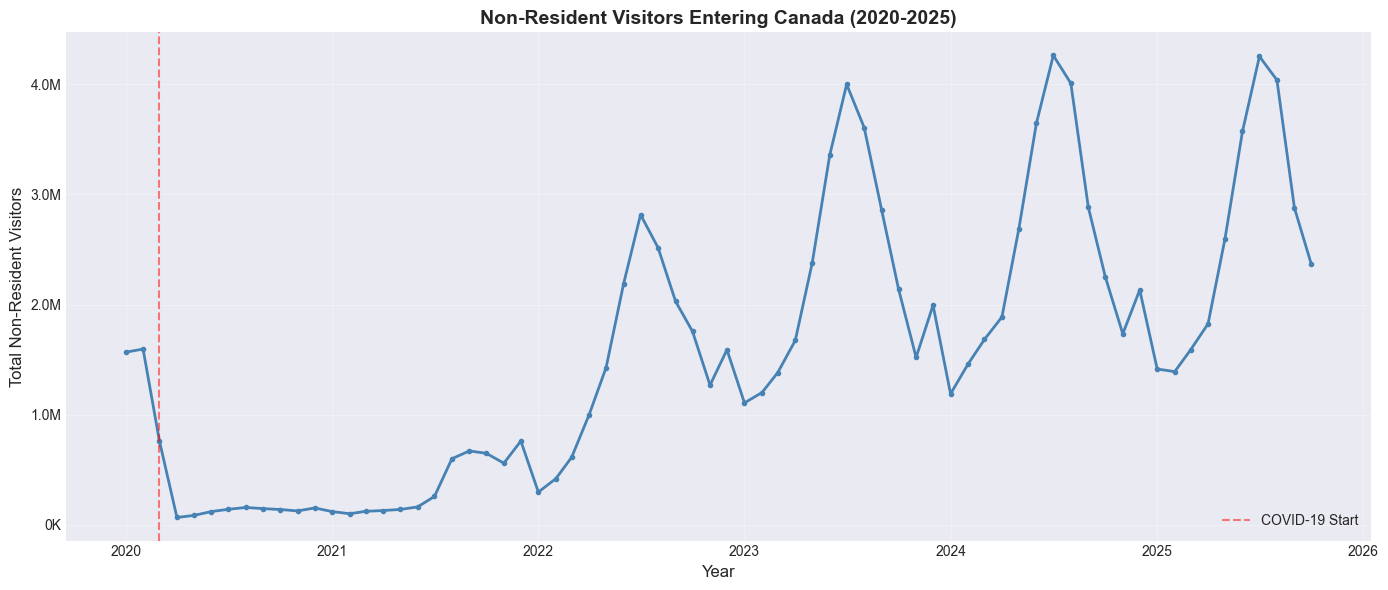

Key Observations:
- COVID-19 impact visible in 2020-2021
- Recovery trend from 2022 onwards
- Clear seasonal patterns (summer peaks)


In [9]:
fig, ax = plt.subplots(figsize=(14, 6))

total_visitors = df_long[df_long['country'] == 'Non-resident visitors entering Canada'].copy()

ax.plot(total_visitors['date'], total_visitors['visitors'], 
        linewidth=2, marker='o', markersize=3, color='steelblue')

ax.axvline(pd.Timestamp('2020-03-01'), color='red', linestyle='--', 
           alpha=0.5, label='COVID-19 Start')

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Total Non-Resident Visitors', fontsize=12)
ax.set_title('Non-Resident Visitors Entering Canada (2020-2025)', 
             fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
ax.yaxis.set_major_formatter(plt.FuncFormatter(
    lambda x, p: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.0f}K'
))

plt.tight_layout()
plt.show()

print('Key Observations:')
print('- COVID-19 impact visible in 2020-2021')
print('- Recovery trend from 2022 onwards')
print('- Clear seasonal patterns (summer peaks)')

### 2.3 U.S. vs Non-U.S. Visitors

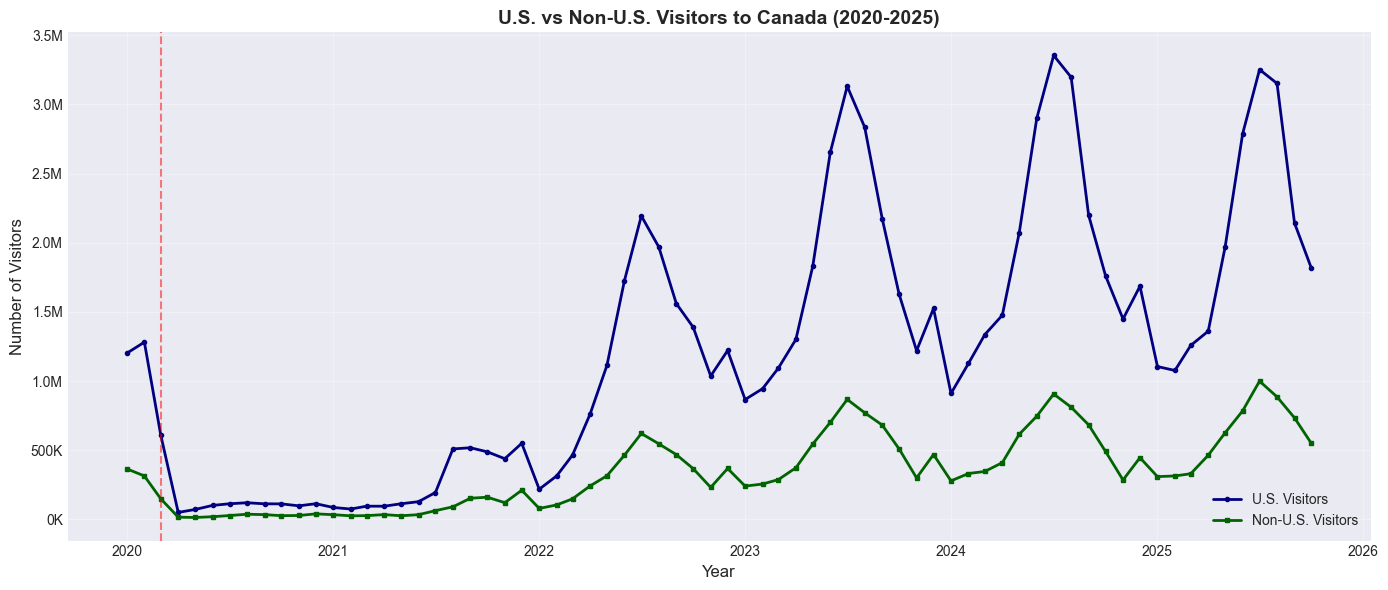

In [10]:
fig, ax = plt.subplots(figsize=(14, 6))

us_data = df_long[df_long['country'] == 
                  'United States of America residents entering Canada'].copy()
other_data = df_long[df_long['country'] == 
                     'Residents of countries other than the United States of America entering Canada'].copy()

ax.plot(us_data['date'], us_data['visitors'], 
        linewidth=2, marker='o', markersize=3, label='U.S. Visitors', color='navy')
ax.plot(other_data['date'], other_data['visitors'], 
        linewidth=2, marker='s', markersize=3, label='Non-U.S. Visitors', color='darkgreen')

ax.axvline(pd.Timestamp('2020-03-01'), color='red', linestyle='--', alpha=0.5)

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of Visitors', fontsize=12)
ax.set_title('U.S. vs Non-U.S. Visitors to Canada (2020-2025)', 
             fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
ax.yaxis.set_major_formatter(plt.FuncFormatter(
    lambda x, p: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.0f}K'
))

plt.tight_layout()
plt.show()

### 2.4 Regional Breakdown (2024)

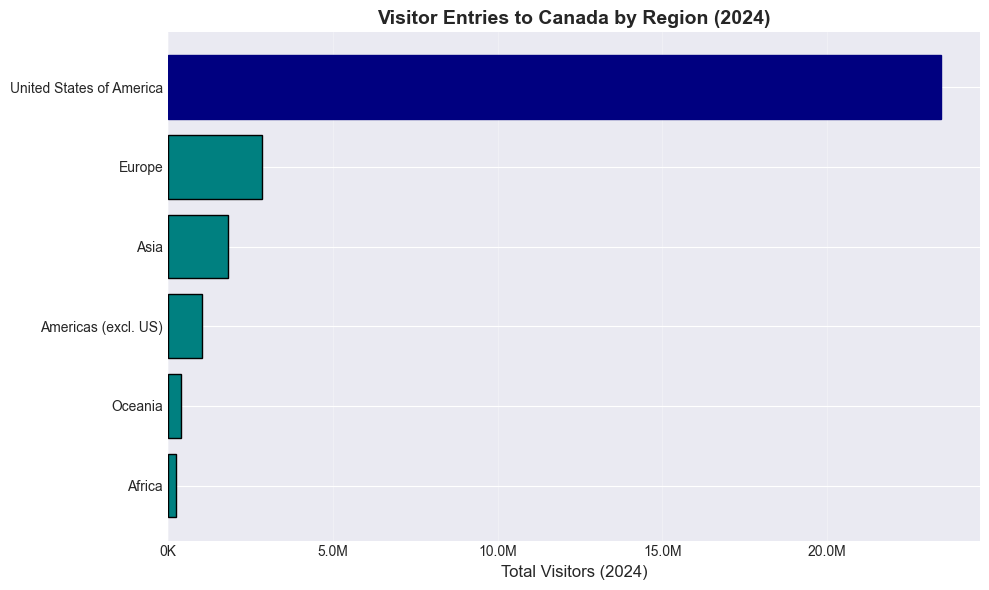

In [11]:
# Get major regions for 2024
regions = ['United States of America residents entering Canada',
           'Europe', 'Asia', 
           'Americas, countries other than the United States of America',
           'Africa', 'Oceania']

regions_2024 = df_cleaned[df_cleaned['country'].isin(regions)].copy()

# Calculate 2024 totals
cols_2024 = [col for col in month_cols if col.endswith('-24')]
regions_2024['total_2024'] = regions_2024[cols_2024].sum(axis=1)
regions_2024 = regions_2024.sort_values('total_2024', ascending=True)

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.barh(range(len(regions_2024)), regions_2024['total_2024'], 
               color='teal', edgecolor='black')

# Highlight US
us_idx = list(regions_2024['country']).index(
    'United States of America residents entering Canada')
bars[us_idx].set_color('navy')

ax.set_yticks(range(len(regions_2024)))
ax.set_yticklabels([c.replace(' residents entering Canada', '').replace(
    'Americas, countries other than the United States of America', 'Americas (excl. US)')
    for c in regions_2024['country']])
ax.set_xlabel('Total Visitors (2024)', fontsize=12)
ax.set_title('Visitor Entries to Canada by Region (2024)', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')
ax.xaxis.set_major_formatter(plt.FuncFormatter(
    lambda x, p: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.0f}K'
))

plt.tight_layout()
plt.show()

### 2.5 Year-over-Year Growth (2024 vs 2023)

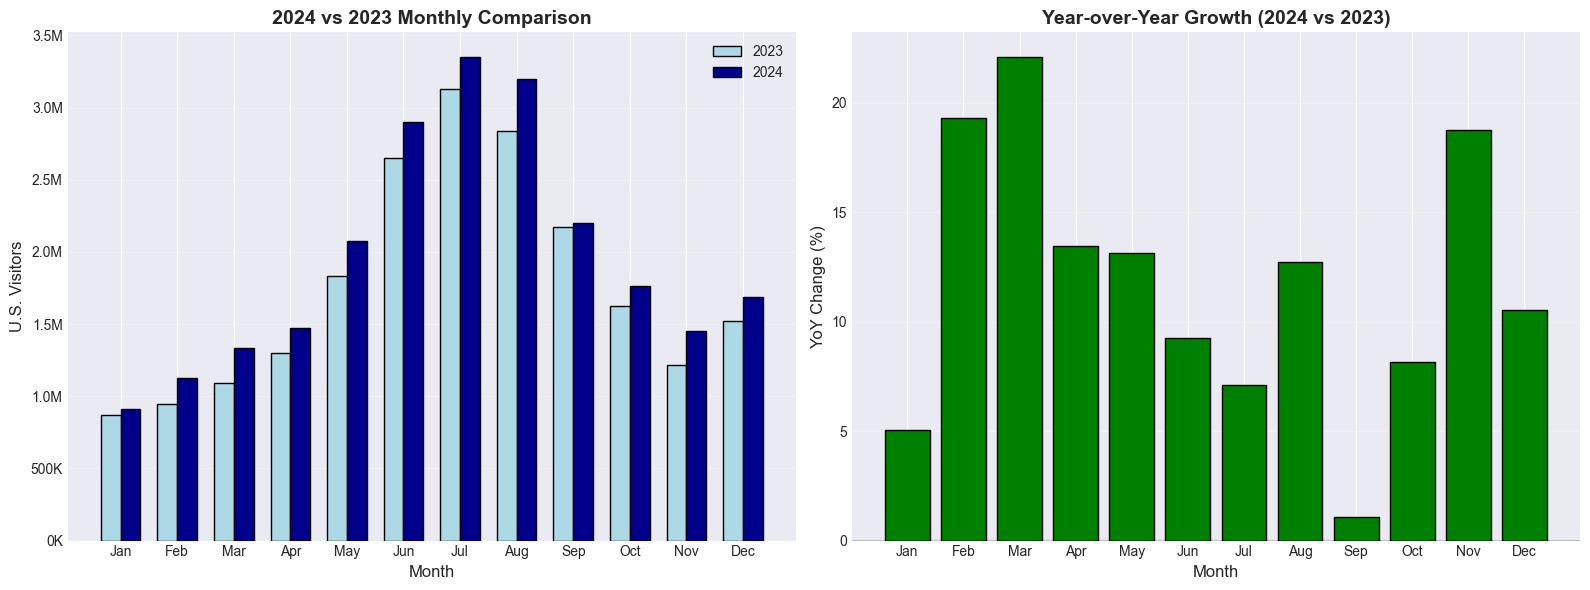

YoY Growth Summary (2024 vs 2023):
Average growth: 11.7%
Best month: Mar (+22.1%)
Worst month: Sep (1.1%)


In [12]:
# Get US visitor data for 2023 and 2024
us_row = df_cleaned[df_cleaned['country'] == 
                    'United States of America residents entering Canada'].iloc[0]

months_2023 = [col for col in month_cols if col.endswith('-23')]
months_2024 = [col for col in month_cols if col.endswith('-24')]

yoy_data = []
for m23, m24 in zip(months_2023, months_2024):
    val_2023 = us_row[m23]
    val_2024 = us_row[m24]
    if pd.notna(val_2023) and pd.notna(val_2024) and val_2023 > 0:
        yoy_pct = ((val_2024 - val_2023) / val_2023) * 100
        yoy_data.append({
            'month': m24.split('-')[0],
            'yoy_pct': yoy_pct,
            'val_2023': val_2023,
            'val_2024': val_2024
        })

df_yoy = pd.DataFrame(yoy_data)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Panel 1: Absolute values
x = np.arange(len(df_yoy))
width = 0.35

ax1.bar(x - width/2, df_yoy['val_2023'], width, label='2023', 
        color='lightblue', edgecolor='black')
ax1.bar(x + width/2, df_yoy['val_2024'], width, label='2024', 
        color='darkblue', edgecolor='black')

ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('U.S. Visitors', fontsize=12)
ax1.set_title('2024 vs 2023 Monthly Comparison', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(df_yoy['month'])
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(
    lambda x, p: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.0f}K'
))

# Panel 2: YoY % change
colors = ['green' if x > 0 else 'red' for x in df_yoy['yoy_pct']]
ax2.bar(range(len(df_yoy)), df_yoy['yoy_pct'], color=colors, edgecolor='black')
ax2.axhline(0, color='black', linewidth=1)

ax2.set_xlabel('Month', fontsize=12)
ax2.set_ylabel('YoY Change (%)', fontsize=12)
ax2.set_title('Year-over-Year Growth (2024 vs 2023)', fontsize=14, fontweight='bold')
ax2.set_xticks(range(len(df_yoy)))
ax2.set_xticklabels(df_yoy['month'])
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print('YoY Growth Summary (2024 vs 2023):')
print(f'Average growth: {df_yoy["yoy_pct"].mean():.1f}%')
print(f'Best month: {df_yoy.iloc[df_yoy["yoy_pct"].idxmax()]["month"]} (+{df_yoy["yoy_pct"].max():.1f}%)')
print(f'Worst month: {df_yoy.iloc[df_yoy["yoy_pct"].idxmin()]["month"]} ({df_yoy["yoy_pct"].min():.1f}%)')

## Part 3: Save Processed Data

In [13]:
# Save cleaned wide format
output_path_wide = processed() / 'canada_visitor_entries_clean.csv'
df_cleaned.to_csv(output_path_wide, index=False)

print('✓ SAVED PROCESSED DATA')
print('='*80)
print(f'Location: {output_path_wide}')
print(f'Size: {output_path_wide.stat().st_size:,} bytes')
print(f'Shape: {df_cleaned.shape}')
print(f'\nReady for Power BI import!')

✓ SAVED PROCESSED DATA
Location: /Users/dpro/projects/travel_manitoba/data/processed/canada_visitor_entries_clean.csv
Size: 19,206 bytes
Shape: (38, 71)

Ready for Power BI import!


## Summary

### Data Cleaning
- ✓ Loaded manual CSV from interim directory
- ✓ Cleaned numeric formatting (removed commas/quotes)
- ✓ Validated Q4 2024 = 4,895,163 (exact match)
- ✓ Validated Q1 2024 = 3,374,265 (exact match)
- ✓ Saved to `data/processed/canada_visitor_entries_clean.csv`

### Key Findings
1. **U.S. Dominance**: Majority of all visitors to Canada
2. **Strong Recovery**: 2024 exceeds pre-COVID levels
3. **Seasonality**: Clear summer peaks (June-August)
4. **Q4 2024 Growth**: YoY comparison

### Next Steps
1. Import `canada_visitor_entries_clean.csv` into Power BI
2. Create measures for YoY%, YTD totals, quarterly aggregations
3. Build visualizations matching Travel Manitoba style